# Time Series Clustering

Here, we load the silhouette widths for various cluster values, select the most appropriate cluster value per objective, and identify the scenarios with the worst clusters.



## Imports

In [1]:
from optimization.scenariodiscovery.clustering.silhouette_widths import *
from optimization.general.visualization import *
from ema_workbench.analysis import plotting, Density
import os

## Load Silhouette Widths

In [2]:
target_directory = os.getcwd() + '/data/'
n = 30000
file_name = f'silhouette_widths_{n}.csv'
widths = pd.read_csv(target_directory + file_name, index_col='Unnamed: 0')
widths

,Utility,Disutility,Intratemporal consumption Gini,Intratemporal damage Gini,Lowest income per capita,Highest damage per capita,Distance to consumption threshold,Population below consumption threshold,Distance to damage threshold,Population above damage threshold,Temperature overshoot
2,0.560358,0.873954,0.720154,0.967140,0.811740,0.743360,0.997859,0.863497,0.321909,0.581371,0.999670
3,0.477727,0.696153,0.706906,0.935458,0.712213,0.598832,0.974178,0.724092,0.286949,0.468754,0.700360
4,0.464792,0.688642,0.662507,0.697855,0.683156,0.616354,0.968213,0.724001,0.568721,0.380939,0.640003
5,0.445861,0.614064,0.610270,0.693067,0.594034,0.573788,0.966558,0.750536,0.555229,0.354896,0.719250
6,0.423164,0.479989,0.609729,0.687497,0.605712,0.553692,0.965224,0.750528,0.528924,0.337293,0.707979
7,0.434677,0.477653,0.501656,0.513262,0.623520,0.540371,0.956651,0.697114,0.391743,0.322578,0.635165
8,0.434129,0.477569,0.493361,0.514345,0.615329,0.528569,0.960427,0.696544,0.389177,0.377919,0.594583
9,0.408874,0.398252,0.483304,0.514790,0.632680,0.511373,0.960851,0.685896,0.441481,0.363954,0.552353
10,0.408459,0.393079,0.483433,0.517813,0.577103,0.512059,0.960683,0.685878,0.441288,0.313277,0.577722


## Plotting silhouette widths

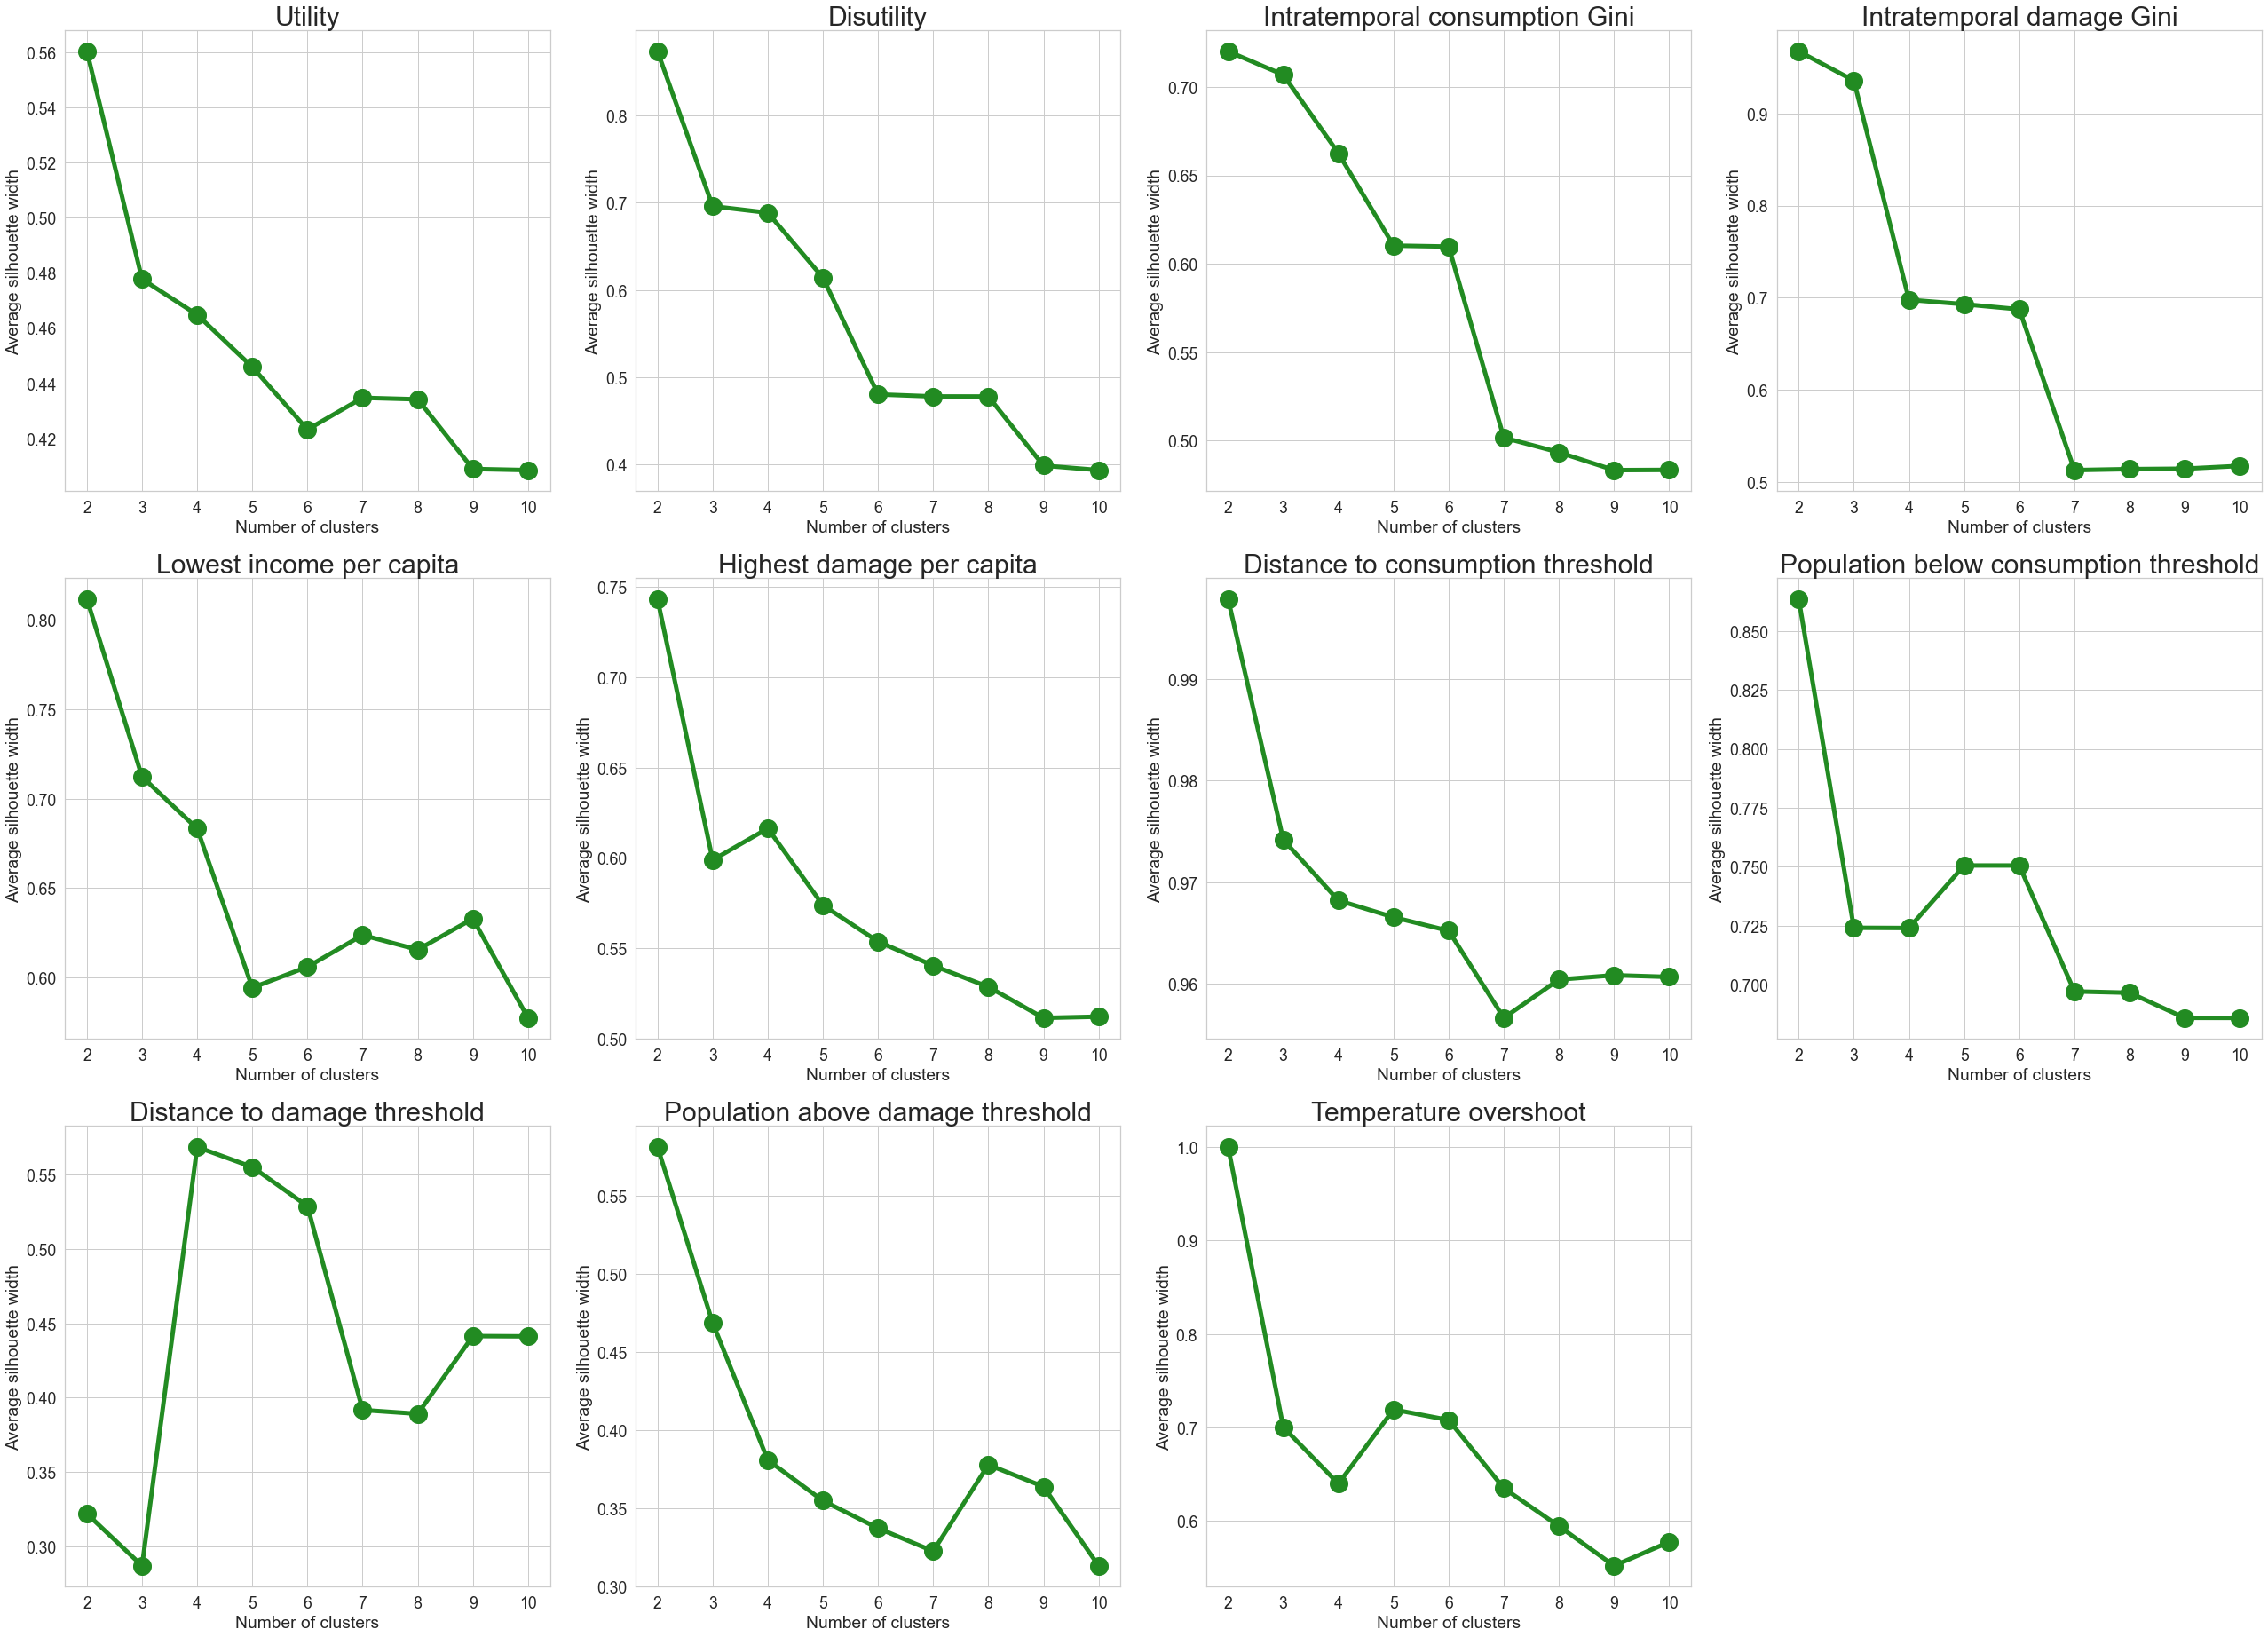

In [3]:
plot_silhouette_widths(widths, saving=False)

## Visual Inspection and Resulting cluster-number per objective

Given the figures above and some visual inspection of the pathways and their clusters, we get the following cluster number per objective:


- 'Utility': 2,
- 'Disutility': ,
- 'Intratemporal consumption GINI': ,
- 'Intratemporal damage GINI': ,
- 'Lowest income per capita': ,
- 'Highest damage per capita': ,
- 'Distance to consumption threshold': ,
- 'Population below consumption threshold': ,
- 'Distance to damage threshold': ,
- 'Population above damage threshold': ,
- 'Temperature overshoot': ,


---

## Looking at the clusters

## Loading outcomes from 30k run

In [4]:
target_directory = os.path.dirname(os.path.dirname(os.getcwd())) + '/exploration/data/'
_, outcomes = load_results(file_name=target_directory + 'results_open_exploration_30000')

outcomes = pd.DataFrame(outcomes)


## Outcome: Disutility

In [5]:
outcome_name = 'Disutility'
relevant_clusters = [2, 3, 4]

In [6]:
experiments_list = [get_experiments_with_clusters(objective=outcome_name, cluster_number=c) for c in relevant_clusters]

### Reshaping outcomes

In order to plot the pathways for one specific outcome variable, we need to reshape the outcomes. The resulting dictionary has now only two keys: `outcome_name` and `Time`.

In [7]:
reshaphed_outcomes = get_outcomes_reshaped(outcomes_df=outcomes, objective_names=[outcome_name])

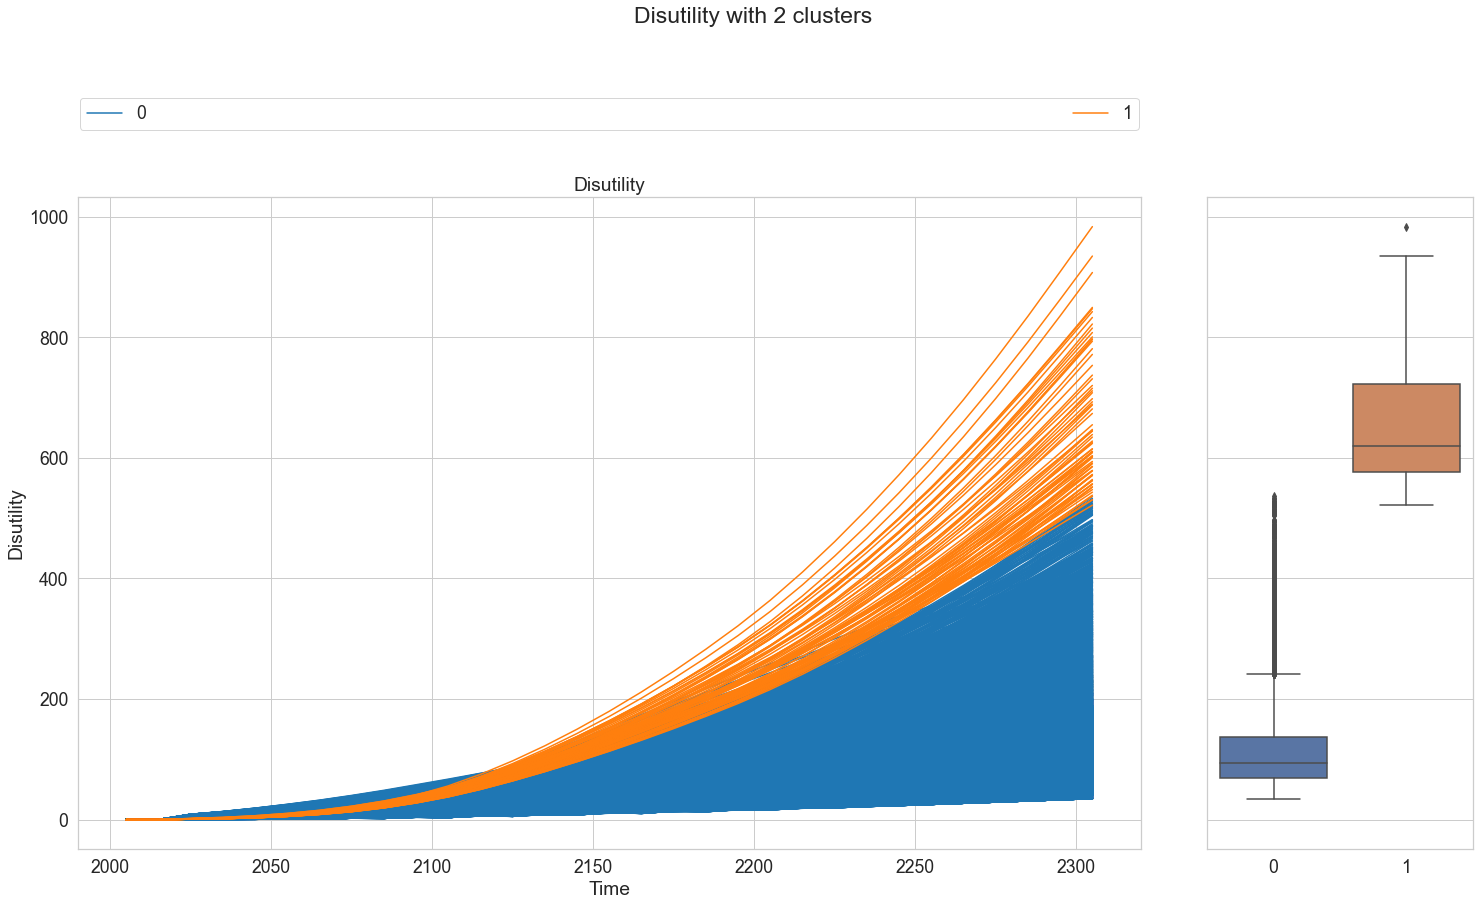

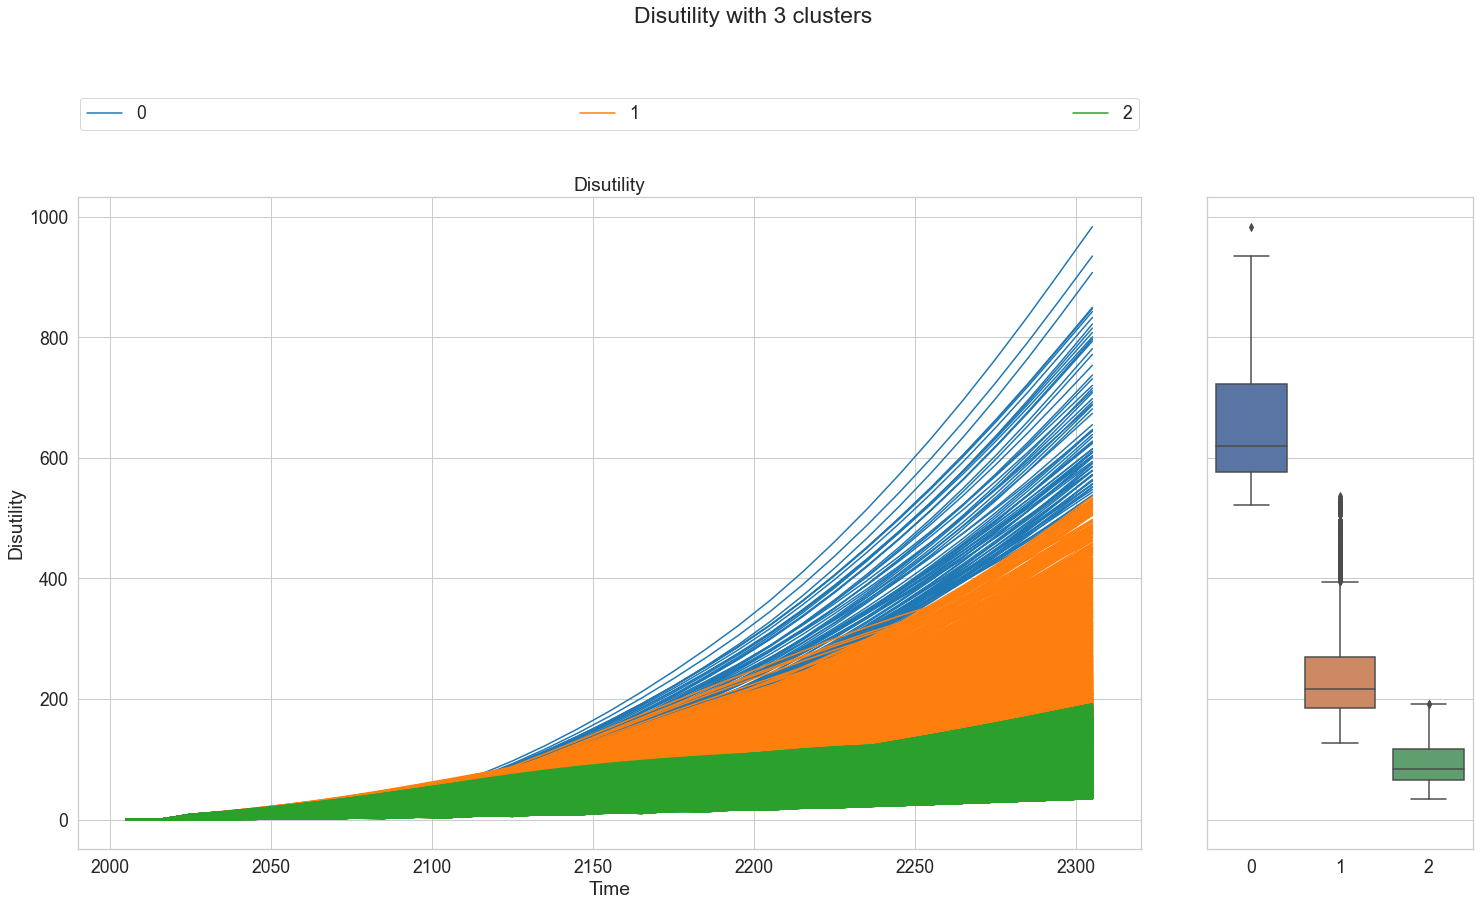

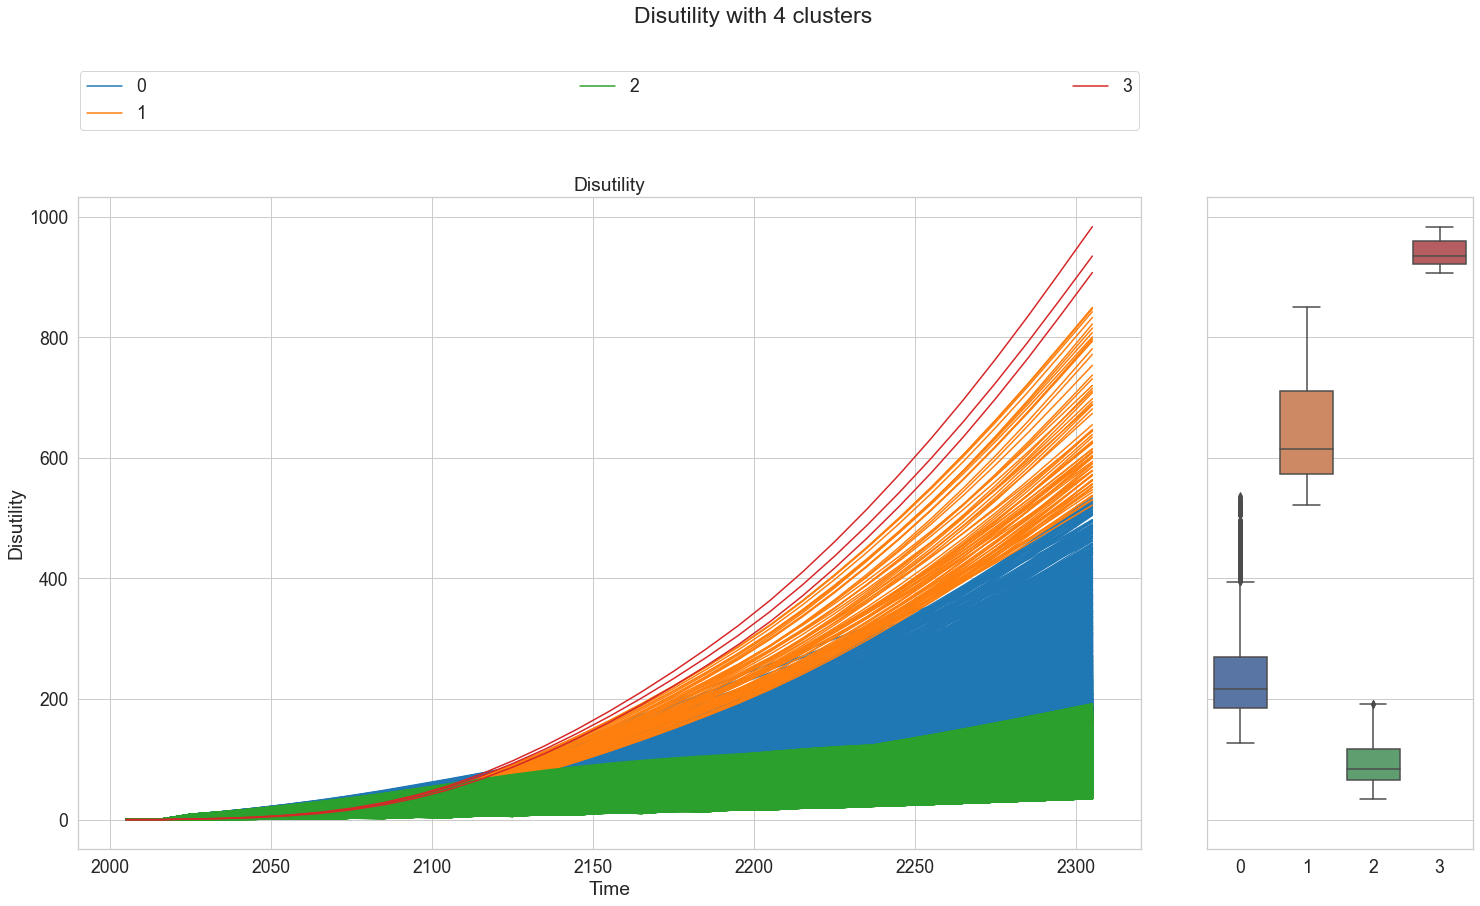

In [16]:
for idx, cluster in enumerate(relevant_clusters):
    fig,axes = plotting.lines(experiments=experiments_list[idx], outcomes=reshaphed_outcomes, outcomes_to_show=outcome_name, group_by='clusters', density=Density.BOXPLOT)
    fig.set_size_inches(15, 8)
    fig.suptitle(f'{outcome_name} with {cluster} clusters', y=1.1)
    plt.show()